In [64]:
import pylab as plt
import numpy as np
import pandas as pd

# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import copy    

import scipy
from scipy import interpolate
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

In [65]:
# f=open("Files/MCEqFluxMeshes_KM.pkl","rb") # Alpha bins
f=open("Files/MCEqFluxMeshes.pkl","rb") # cosalpha bins
EBins, cosas, gs, FluxMeshes= pickle.load(f)
f.close()

f=open("../Files/LinInterps.pkl","rb") # Proposal Interpolated Output
# f=open("../Proposal/Files/LinInterps.pkl","rb") # Proposal Interpolated Output
LinInterps=pickle.load(f)
f.close()

In [66]:
# Getting Survival fractions for different MCeQ options
eps=0.01
survivalfractions=[]
correctedmeshes=[]

for ei in range(0,len(EBins)-2):
    mesh=copy.copy(FluxMeshes[ei])
    survmesh=np.zeros_like(mesh)
    for ica in range(len(cosas)):
        for ig in range(len(gs)):
            surv=LinInterps[ei](cosas[ica]+eps,gs[ig])
            survmesh[ica,ig]=surv
            mesh[ica,ig]=mesh[ica,ig]*surv
    correctedmeshes.append(mesh)
    survivalfractions.append(survmesh)
    

In [67]:
totalflux=np.zeros_like(correctedmeshes[0])
for m in correctedmeshes:
    totalflux+=m

print(np.nanmax(totalflux.flatten()))
print(cosas)

3.3697917781005696e-07
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


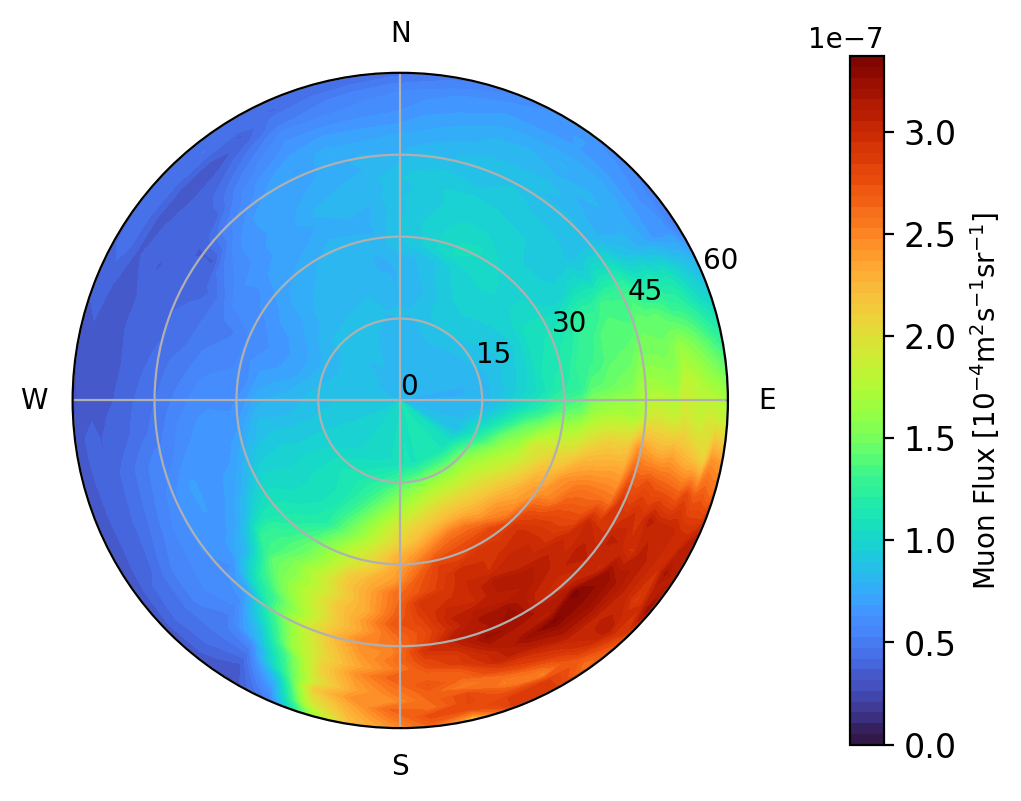

In [68]:
#This puts in same format as the muon flux measurement done directly with the paddles in Canfranc
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(5,5),dpi=200)
levels=np.linspace(0,np.nanmax(totalflux.flatten()),65)
im=ax.contourf(gs,np.arccos(cosas)*180/3.14, totalflux,cmap='turbo',levels=levels)
# im=ax.contourf(gs,cosas*180/3.14, totalflux,cmap='turbo',levels=levels)
ax.set_rlim(0,60)
ax.set_rticks([0,15,30,45,60])
#ax.tick_params(axis='both', colors='White')
cb =plt.colorbar(im, shrink=0.7,ticks=np.arange(0,np.nanmax(totalflux.flatten()),5e-8))
#cb = fig.colorbar(im, shrink=0.7)

cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
cb.ax.tick_params(labelsize=12)
ax.set_thetagrids([0,90,180,270],['E','N','W','S'])
ax.set(facecolor = "lightgrey",alpha=0.2)
#plt.savefig("./PolarFluxes.png",dpi=250,bbox_inches='tight')
plt.show()